<a href="https://colab.research.google.com/github/Grandes/DeepLearningwithPython_keras/blob/master/2chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
keras.__version__

'2.2.4'

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_labels.shape

(10000,)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt

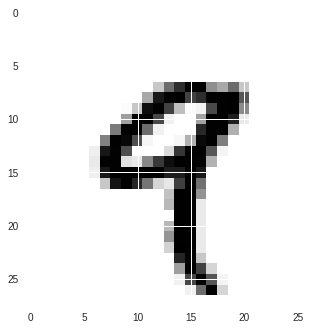

In [12]:
digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [14]:
#2-2 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#2-3 컴파일 단계
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
#2-4 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
#2-5 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
#모델 학습
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2573 - acc: 0.9244
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.1043 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0683 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0504 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0380 - acc: 0.9885


In [19]:
#테스트 데이터셋에서 확인
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 50us/step


In [20]:
print('test_acc:', test_acc, 'test_loss:', test_loss)

test_acc: 0.9799 test_loss: 0.062042078000836776
